In [69]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as pca
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE

In [18]:
mnist_training_data = pd.read_csv("mnist_train.csv")
mnist_testing_data = pd.read_csv("mnist_test.csv")

5
0
4
1
9


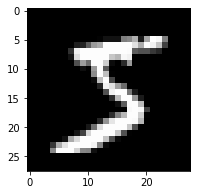

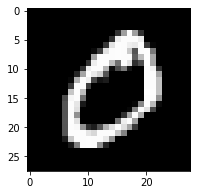

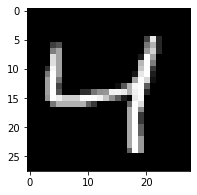

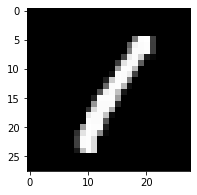

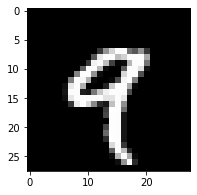

In [19]:
for i in range(5):
    tem_pixel=mnist_training_data.loc[i][1:]
    # plot MNIST numbers
    plt.figure(figsize=(3,3))
    grid_data = tem_pixel.values.reshape(28,28)
    plt.imshow(grid_data, cmap='gray')
    print(mnist_training_data.loc[i][0])

Text(0.5, 1.0, 'Distribution of MNIST Images (Training Set)')

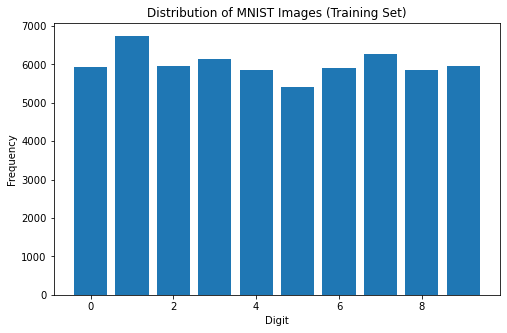

In [20]:
num_label=[0]*10
for num in mnist_training_data['label']:
    num_label[num] += 1
plt.figure(figsize=(8,5))
x = np.arange(10)
plt.bar(x, height=num_label)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Distribution of MNIST Images (Training Set)")

Text(0.5, 1.0, 'Distribution of MNIST Images (Testing Set)')

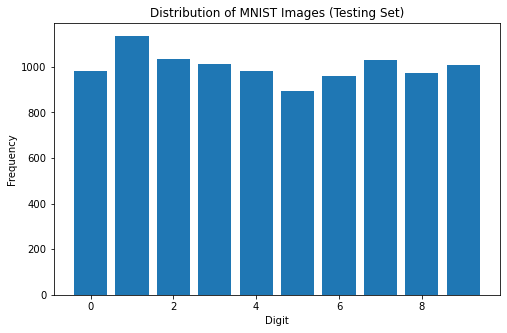

In [21]:
num_label=[0]*10
for num in mnist_testing_data['label']:
    num_label[num] += 1
plt.figure(figsize=(8,5))
x = np.arange(10)
plt.bar(x, height=num_label)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Distribution of MNIST Images (Testing Set)")

In [22]:
X_train = mnist_training_data.drop(['label'], axis='columns', inplace=False)
Y_train = mnist_training_data['label']
X_test = mnist_testing_data.drop(['label'], axis='columns', inplace=False)
Y_test = mnist_testing_data['label']

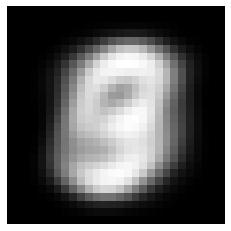

5


In [77]:
from sklearn.decomposition import NMF
nmf_1 = NMF(n_components=1,init='random',random_state=0)
nmf_1.fit(X_train)
X_train_nmf_1 = nmf_1.fit_transform(X_train)
X_test_nmf_1 = nmf_1.transform(X_test)

img = nmf_1.inverse_transform(X_train_nmf_1[0])
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [24]:
from sklearn.neighbors import KNeighborsClassifier
temp = []

In [35]:
#n = 1
clf = KNeighborsClassifier()
clf.fit(X_train_nmf_1,Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_1) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_1) == Y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_1), average='macro')) 
print(recall_score(Y_test,clf.predict(X_test_nmf_1), average='macro'))


訓練資料辨識率: 0.3999
測試資料辨識率: 0.1648
0.14344104334416855
0.15802990207838288


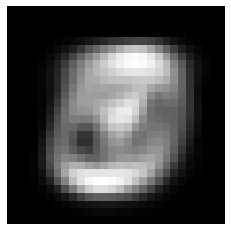

5


In [76]:
nmf_5 = NMF(n_components=5,random_state=0)
nmf_5.fit(X_train)
X_train_nmf_5 = nmf_5.transform(X_train)
X_test_nmf_5 = nmf_5.transform(X_test)
img = nmf_5.inverse_transform(X_train_nmf_5[0])
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])


In [38]:
#n = 5
clf = KNeighborsClassifier()
clf.fit(X_train_nmf_5,Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_5) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_5) == Y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_5), average='macro')) 
print(recall_score(Y_test,clf.predict(X_test_nmf_5), average='macro'))


訓練資料辨識率: 0.7590666666666667
測試資料辨識率: 0.667
0.6599195363951132
0.6633616033622115


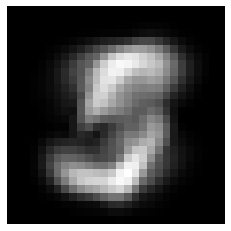

5


In [78]:
nmf_10 = NMF(n_components=10,random_state=0)
nmf_10.fit(X_train)
X_train_nmf_10 = nmf_10.transform(X_train)
X_test_nmf_10 = nmf_10.transform(X_test)
img = nmf_10.inverse_transform(X_train_nmf_10[0])
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [42]:
#n = 10
clf = KNeighborsClassifier()

clf.fit(X_train_nmf_10,Y_train)
print('Train score:',clf.score(X_train_nmf_10,Y_train))
print('test score:',clf.score(X_test_nmf_10,Y_test))
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_10), average='macro')) 
print(recall_score(Y_test,clf.predict(X_test_nmf_10), average='macro'))

Train score: 0.9040666666666667
test score: 0.8647
0.8622618788798586
0.8624636520285403


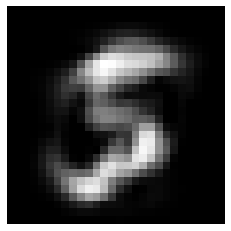

5


In [79]:
nmf_30 = NMF(n_components=30,random_state=0)
nmf_30.fit(X_train)
X_train_nmf_30 = nmf_30.transform(X_train)
X_test_nmf_30 = nmf_30.transform(X_test)
img = nmf_30.inverse_transform(X_train_nmf_30[0])
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])

In [45]:
#n = 30
clf = KNeighborsClassifier()

clf.fit(X_train_nmf_30,Y_train)
print('Train score:',clf.score(X_train_nmf_30,Y_train))
print('test score:',clf.score(X_test_nmf_30,Y_test))
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_30), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_30), average='macro'))

Train score: 0.9710666666666666
test score: 0.9558
0.9556144714165049
0.9552910220926935


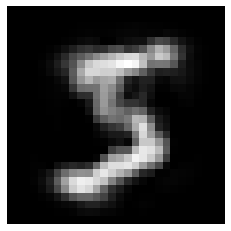

5


In [82]:
nmf_50 = NMF(n_components=50,random_state=0)
nmf_50.fit(X_train)
X_train_nmf_50 = nmf_50.transform(X_train)
X_test_nmf_50 = nmf_50.transform(X_test)
img = nmf_50.inverse_transform(X_train_nmf_50[0])
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])


In [50]:
clf = KNeighborsClassifier()

clf.fit(X_train_nmf_50,Y_train)
print('Train score:',clf.score(X_train_nmf_50,Y_train))
print('test score:',clf.score(X_test_nmf_50,Y_test))
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_50), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_50), average='macro'))

Train score: 0.9714666666666667
test score: 0.9563
0.956108992469845
0.955779419735749


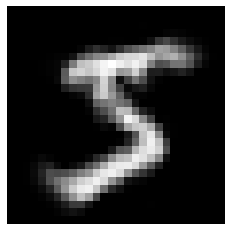

5


In [80]:
nmf_100 = NMF(n_components=100,random_state=0)
nmf_100.fit(X_train)
X_train_nmf_100 = nmf_100.transform(X_train)
X_test_nmf_100 = nmf_100.transform(X_test)
img = nmf_100.inverse_transform(X_train_nmf_100[0])
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])


In [72]:
#n = 100
clf = KNeighborsClassifier()

clf.fit(X_train_nmf_100,Y_train)
print('Train score:',clf.score(X_train_nmf_100,Y_train))
print('test score:',clf.score(X_test_nmf_100,Y_test))
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_100), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_100), average='macro'))

Train score: 0.9701333333333333
test score: 0.9508
0.9510840456989816
0.9499764926473139


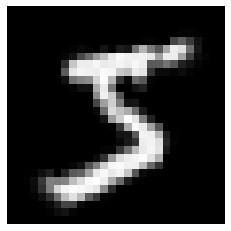

5


In [81]:
nmf_200 = NMF(n_components=200,random_state=0)
nmf_200.fit(X_train)
X_train_nmf_200 = nmf_200.transform(X_train)
X_test_nmf_200 = nmf_200.transform(X_test)
img = nmf_200.inverse_transform(X_train_nmf_200[0])
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])


In [102]:
clf = KNeighborsClassifier()

clf.fit(X_train_nmf_200,Y_train)
print('Train score:',clf.score(X_train_nmf_200,Y_train))
print('test score:',clf.score(X_test_nmf_200,Y_test))
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_200), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_200), average='macro'))

Train score: 0.9628333333333333
test score: 0.9396
0.9399460061920795
0.938341722862185


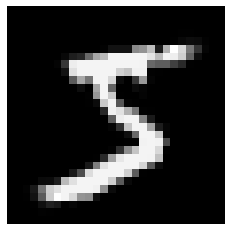

5


In [101]:
nmf_500 = NMF(n_components=500,random_state=0)
nmf_500.fit(X_train)
X_train_nmf_500 = nmf_500.transform(X_train)
X_test_nmf_500 = nmf_500.transform(X_test)
img = nmf_500.inverse_transform(X_train_nmf_500[0])
img = img.reshape(28,28)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])


In [112]:
#n = 500
clf = KNeighborsClassifier()

clf.fit(X_train_nmf_500,Y_train)
print('Train score:',clf.score(X_train_nmf_500,Y_train))
print('test score:',clf.score(X_test_nmf_500,Y_test))
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_500), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_500), average='macro'))

Train score: 0.9421833333333334
test score: 0.9091
0.9114178140423798
0.9077804057863386


In [39]:
from sklearn.decomposition import NMF
nmf_1 = NMF(n_components=1,init='random',random_state=0)
nmf_1.fit(X_train)
X_train_nmf_1 = nmf_1.fit_transform(X_train)
X_test_nmf_1 = nmf_1.transform(X_test)


In [103]:
clf = SVC()
clf.fit(X_train_nmf_1, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_1) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_1) == Y_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_1), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_1), average='macro'))

訓練資料辨識率: 0.20456666666666667
測試資料辨識率: 0.2061


C:\Users\user\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.12574230855486052
0.19622264678038231


In [84]:
clf = SVC()
clf.fit(X_train_nmf_5, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_5) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_5) == Y_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_5), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_5), average='macro'))

訓練資料辨識率: 0.7037833333333333
測試資料辨識率: 0.7054
0.6993508122936041
0.7028380157010137


In [85]:
clf = SVC()
clf.fit(X_train_nmf_10, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_10) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_10) == Y_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_10), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_10), average='macro'))

訓練資料辨識率: 0.8895833333333333
測試資料辨識率: 0.8815
0.879839567044703
0.8797450316119839


In [86]:
clf = SVC()
clf.fit(X_train_nmf_30, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_30) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_30) == Y_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_30), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_30), average='macro'))

訓練資料辨識率: 0.9805666666666667
測試資料辨識率: 0.9715
0.971396917547486
0.9712509823846325


In [104]:
clf = SVC()
clf.fit(X_train_nmf_50, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_50) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_50) == Y_test))
clf.predict(X_train_nmf_50)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_50), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_50), average='macro'))

訓練資料辨識率: 0.9866666666666667
測試資料辨識率: 0.9781
0.9780034417812802
0.978041300739202


In [105]:
clf = SVC()
clf.fit(X_train_nmf_100, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_100) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_100) == Y_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_100), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_100), average='macro'))

訓練資料辨識率: 0.9894166666666667
測試資料辨識率: 0.9765
0.976497977375981
0.9764193849155953


In [106]:
clf = SVC()
clf.fit(X_train_nmf_200, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_200) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_200) == Y_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_200), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_200), average='macro'))

訓練資料辨識率: 0.9878333333333333
測試資料辨識率: 0.9739
0.97372758564824
0.9736618200489835


In [111]:
clf = SVC()
clf.fit(X_train_nmf_500,Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_500) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_500) == Y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_500), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_500), average='macro'))

訓練資料辨識率: 0.9846833333333334
測試資料辨識率: 0.967
0.966787032456702
0.9667983721690161


In [87]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_nmf_1, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_1) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_1) == Y_test))
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_1), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_1), average='macro'))

訓練資料辨識率: 0.9976333333333334
測試資料辨識率: 0.147
0.14469685928626103
0.14325561763214603


In [88]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_nmf_5, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_5) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_5) == Y_test))
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_5), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_5), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.6116
0.6095457500294039
0.6077066022211065


In [89]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_nmf_10, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_10) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_10) == Y_test))
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_10), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_10), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.7993
0.7970638854622962
0.7963489237855602


In [90]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_nmf_30, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_30) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_30) == Y_test))
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_30), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_30), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8811
0.8795244337070611
0.879400864872777


In [91]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_nmf_50, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_50) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_50) == Y_test))
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_50), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_50), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8697
0.8689235752940698
0.8679549803206535


In [92]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_nmf_100, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_100) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_100) == Y_test))
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_100), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_100), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8663
0.8643601487247456
0.8643805265538503


In [107]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_nmf_200, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_200) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_200) == Y_test))
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_200), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_200), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8676
0.8661790075401342
0.8659970366746365


In [108]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_nmf_500, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_500) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_500) == Y_test))
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(precision_score(Y_test,clf.predict(X_test_nmf_500), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_500), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8425
0.8404265233116325
0.8405518331031658


In [93]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_nmf_1,  Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_1) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_1) == Y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_1), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_1), average='macro'))

訓練資料辨識率: 0.99755
測試資料辨識率: 0.1471
0.14477695391231332
0.1433569344628403


In [94]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_nmf_5,  Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_5) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_5) == Y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_5), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_5), average='macro'))

訓練資料辨識率: 0.9999833333333333
測試資料辨識率: 0.7039
0.7008664018626443
0.7012127405416022


In [95]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_nmf_10,  Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_10) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_10) == Y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_10), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_10), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.8872
0.8855110873173258
0.8855651632502903


In [96]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_nmf_30,  Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_30) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_30) == Y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_30), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_30), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.9596
0.9593445594009786
0.9592444319156552


In [97]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_nmf_50,  Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_50) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_50) == Y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_50), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_50), average='macro'))

訓練資料辨識率: 0.9999833333333333
測試資料辨識率: 0.9655
0.9653383005106659
0.9652170652423135


In [98]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_nmf_100,  Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_100) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_100) == Y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_100), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_100), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.9654
0.965135165132472
0.9650960935264414


In [99]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_nmf_200,  Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_200) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_200) == Y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_200), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_200), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.9644
0.9642178825866855
0.964046711469585


In [109]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_nmf_500,  Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(X_train_nmf_500) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(X_test_nmf_500) == Y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(Y_test,clf.predict(X_test_nmf_500), average='macro'))  
print(recall_score(Y_test,clf.predict(X_test_nmf_500), average='macro'))

訓練資料辨識率: 1.0
測試資料辨識率: 0.9624
0.9620950745411484
0.9622171823013153
